In [139]:
## load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))

In [2]:
### ASE

In [3]:
all.ase.filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase/complete_ase_phased.all_leads.tsv"

In [4]:
all.ase = read.csv(all.ase.filename, sep = "\t", as.is = T, header = T)
all.ase[1:5,1:5]

ensembl_gene_id,snp_id,X24722_4.117,X24722_4.118,X24722_4.145
ENSG00000076924,19_7710920_G_A,NA,NA,NA
ENSG00000233927,19_8387207_G_A,0.4444444,0.2307692,0.483871
ENSG00000226278,7_55802063_T_C,NA,NA,NA
ENSG00000164587,5_149826526_C_T,NA,NA,NA
ENSG00000163682,4_39446549_G_A,NA,NA,NA


In [5]:
colnames(all.ase) <- gsub("\\.","#",gsub("X","",colnames(all.ase)))
all.ase[1:5,1:5]

ensembl_gene_id,snp_id,24722_4#117,24722_4#118,24722_4#145
ENSG00000076924,19_7710920_G_A,NA,NA,NA
ENSG00000233927,19_8387207_G_A,0.4444444,0.2307692,0.483871
ENSG00000226278,7_55802063_T_C,NA,NA,NA
ENSG00000164587,5_149826526_C_T,NA,NA,NA
ENSG00000163682,4_39446549_G_A,NA,NA,NA


In [6]:
all.ase.use = all.ase[,3:ncol(all.ase)]
rownames(all.ase.use) = paste0(all.ase$ensembl_gene_id,"-",all.ase$snp_id)
all.ase.use[1:5,1:5]

,24722_4#117,24722_4#118,24722_4#145,24722_4#165,24722_4#172
ENSG00000076924-19_7710920_G_A,NA,NA,NA,NA,NA
ENSG00000233927-19_8387207_G_A,0.4444444,0.2307692,0.483871,0.4722222,0.3
ENSG00000226278-7_55802063_T_C,NA,NA,NA,NA,NA
ENSG00000164587-5_149826526_C_T,NA,NA,NA,NA,NA
ENSG00000163682-4_39446549_G_A,NA,NA,NA,NA,NA


In [7]:
all.ase.use = all.ase.use[,order(colnames(all.ase.use))]
all.ase.use[1:5,1:5]

,20416_1#112,20416_1#117,20416_1#121,20416_1#122,20416_1#138
ENSG00000076924-19_7710920_G_A,NA,NA,NA,NA,NA
ENSG00000233927-19_8387207_G_A,0.4325843,NA,NA,NA,NA
ENSG00000226278-7_55802063_T_C,NA,NA,NA,NA,NA
ENSG00000164587-5_149826526_C_T,NA,NA,0.35789474,0.37142857,NA
ENSG00000163682-4_39446549_G_A,NA,NA,0.07017544,0.04819277,NA


In [8]:
### cell factors

In [9]:
factors.filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts.PCA.cluster_means.tsv"

In [10]:
factors = read.csv(factors.filename, sep = "\t", header = T, row.names = 1)
colnames(factors) <- gsub("X","",colnames(factors))
head(factors)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,50,51,52,53,54,55,56,57,58,59
21843_1#10,-2.96677786,-5.051700,2.557705,1.7846318,-3.8000932,2.7520889,0.04011419,-0.65210263,-2.4088645,-1.4745952,⋯,0.9746980,1.157624,1.0561422,0.6647575,1.0319868,0.9611851,1.1291618,1.1297945,1.105578,1.475525
21843_1#100,2.99582684,-9.416975,3.945243,4.6289860,-1.2671332,1.6378075,0.24622875,2.11823943,-0.1742999,-1.1184431,⋯,0.8779742,1.035389,0.7064237,0.7908379,0.9249539,0.9632030,0.9793299,0.9073227,1.006672,1.317119
21843_1#101,-0.08867775,-6.769028,5.613472,1.8904508,-1.3355565,0.6089684,0.80128325,0.42480083,1.0950508,1.1932872,⋯,0.9319036,1.083866,0.8746851,0.6844323,0.9858303,0.9590457,1.1212404,1.1387067,1.041555,1.390104
21843_1#102,-5.00171746,-4.727163,2.400886,2.0255520,-2.0095244,5.2201763,1.46083794,-1.89020695,-0.4836101,0.6099583,⋯,0.9637354,1.166783,1.0856965,0.5970522,1.0349560,0.8610726,1.1574574,1.1208192,1.088636,1.499318
21843_1#103,-2.08193872,-6.209893,4.675325,0.5933318,-0.6481828,3.4695832,-0.36674697,-0.72786039,-0.6366988,0.3395057,⋯,1.0077623,1.192433,1.0881635,0.6984261,0.9993791,0.9143417,1.0999614,1.0552629,1.053882,1.557355
21843_1#105,-0.71012454,-6.392112,4.809889,0.5048616,-0.4834257,1.2074208,3.08038259,0.05347892,-1.7887607,-2.4269346,⋯,0.9450494,1.060659,1.0799314,0.8152264,0.9843815,0.9029240,1.0742548,1.1586082,1.167950,1.494102


In [11]:
factors.use = factors[,c("PC1","0","10","28","30")]

In [12]:
factors.use = factors.use[order(rownames(factors.use)),]
head(factors.use)

,PC1,0,10,28,30
21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237
21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913
21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360
21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105
21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869
21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080


In [13]:
#### combine

In [14]:
all.ase.use = all.ase.use[,colnames(all.ase.use) %in% rownames(factors.use)]
all.ase.use[1:5,1:5]

,21241_6#10,21241_6#100,21241_6#101,21241_6#103,21241_6#104
ENSG00000076924-19_7710920_G_A,NA,NA,NA,NA,NA
ENSG00000233927-19_8387207_G_A,NA,NA,NA,0.4615385,NA
ENSG00000226278-7_55802063_T_C,NA,NA,NA,NA,NA
ENSG00000164587-5_149826526_C_T,0.39705882,0.3548387,NA,0.3815789,NA
ENSG00000163682-4_39446549_G_A,0.08571429,0.2142857,0.1176471,NA,NA


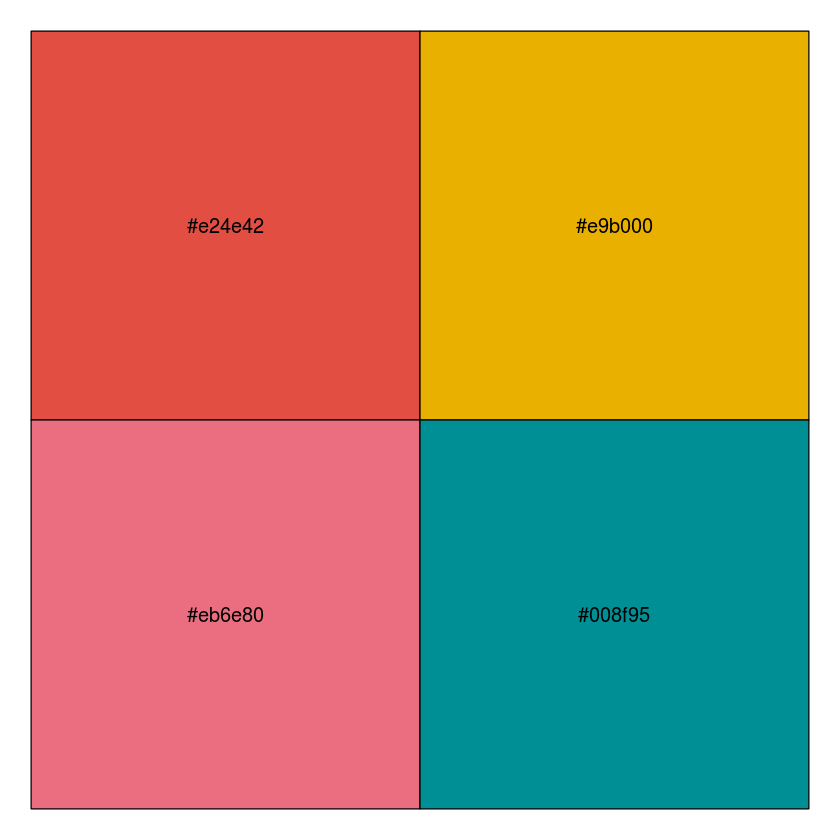

In [18]:
require("scales")
show_col(canva_pal("Bold and punchy")(4))

In [144]:
col_g2m = canva_pal("Bold and punchy")(4)[4]
col_resp = canva_pal("Bold and punchy")(4)[2]

In [145]:
df1 = factors.use
df1$cells = rownames(factors.use)
head(df1)

,PC1,0,10,28,30,cells
21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237,21241_6#10
21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913,21241_6#100
21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360,21241_6#101
21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105,21241_6#103
21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869,21241_6#104
21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080,21241_6#105


In [146]:
gene = "ENSG00000141510_TP53"
gene_symbol = "TP53"
ensembl_gene_id = "ENSG00000141510"

In [147]:
df0 = data.frame(gene =  t(all.ase.use[grep(ensembl_gene_id, rownames(all.ase.use)),]), cells = colnames(all.ase.use))
head(df0)

,ENSG00000141510.17_7557060_G_A,cells
21241_6#10,NA,21241_6#10
21241_6#100,NA,21241_6#100
21241_6#101,NA,21241_6#101
21241_6#103,NA,21241_6#103
21241_6#104,NA,21241_6#104
21241_6#105,NA,21241_6#105


In [148]:
df = inner_join(df0,df1,by = "cells")
head(df)

ENSG00000141510.17_7557060_G_A,cells,PC1,0,10,28,30
NA,21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237
NA,21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913
NA,21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360
NA,21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105
NA,21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869
NA,21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080


In [149]:
df.plot = df
colnames(df.plot) <- c("snp","cells","pseudo","respiration","G1S","chol","G2M")
head(df.plot)

snp,cells,pseudo,respiration,G1S,chol,G2M
NA,21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237
NA,21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913
NA,21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360
NA,21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105
NA,21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869
NA,21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080


In [150]:
p = ggplot(df.plot, aes(x = pseudo, y = snp))
p = p + ggtitle(gene_symbol)
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_density_2d(col = "lightslateblue") 
p = p + stat_smooth(colour = "lightslateblue", linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p1 = p 
##
p = ggplot(df.plot, aes(x = G2M, y = snp))
p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
p = p + geom_density_2d(col = col_g2m) 
p = p + stat_smooth(colour = col_g2m, linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p2 = p 
##
p = ggplot(df.plot, aes(x = respiration, y = snp))
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_density_2d(col = col_resp) 
p = p + stat_smooth(colour = col_resp, linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p3 = p + xlim(c(0.6,1.4))

Warning message:
“Removed 33680 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33680 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 33680 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33680 rows containing non-finite values (stat_smooth).”

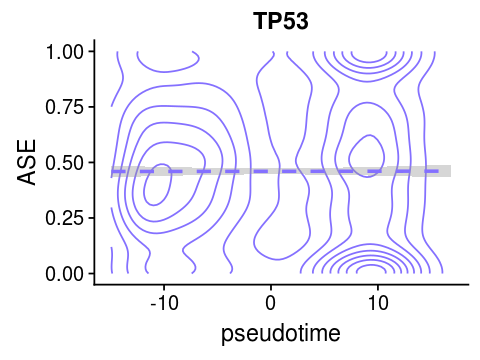

Warning message:
“Removed 33704 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 33704 rows containing non-finite values (stat_smooth).”

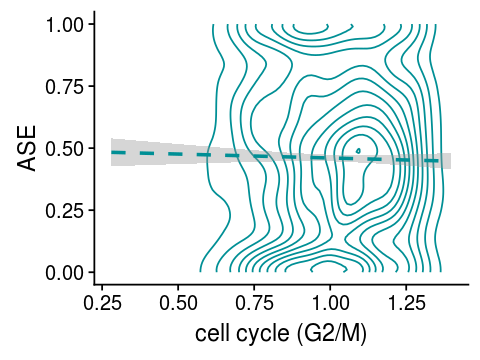

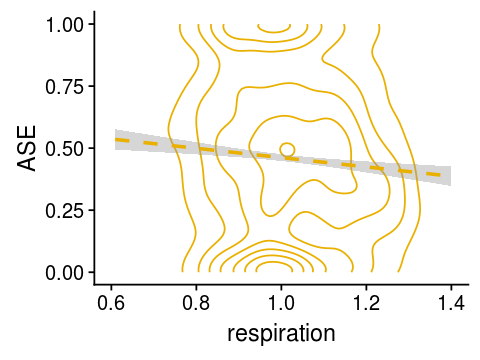

In [153]:
options(repr.plot.width = 4, repr.plot.height = 3)
p1
p2
p3

In [154]:
gene = "ENSG00000149084_HSD17B12"
gene_symbol = "HSD17B12"
ensembl_gene_id = "ENSG00000149084"

In [155]:
df0 = data.frame(gene =  t(all.ase.use[grep(ensembl_gene_id, rownames(all.ase.use)),]), cells = colnames(all.ase.use))
head(df0)

,gene.ENSG00000149084.11_43813776_T_G,gene.ENSG00000149084.11_43822885_A_G,cells
21241_6#10,NA,0.4444444,21241_6#10
21241_6#100,NA,0.2222222,21241_6#100
21241_6#101,0.3333333,0.3333333,21241_6#101
21241_6#103,NA,NA,21241_6#103
21241_6#104,0.5357143,0.5357143,21241_6#104
21241_6#105,NA,0.4615385,21241_6#105


In [156]:
df = inner_join(df0,df1,by = "cells")
head(df)

gene.ENSG00000149084.11_43813776_T_G,gene.ENSG00000149084.11_43822885_A_G,cells,PC1,0,10,28,30
NA,0.4444444,21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237
NA,0.2222222,21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913
0.3333333,0.3333333,21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360
NA,NA,21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105
0.5357143,0.5357143,21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869
NA,0.4615385,21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080


In [157]:
df.plot = df
colnames(df.plot) <- c("snp1","snp2","cells","pseudo","respiration","G1S","chol","G2M")
head(df.plot)

snp1,snp2,cells,pseudo,respiration,G1S,chol,G2M
NA,0.4444444,21241_6#10,13.228098,0.6783386,0.9383156,1.1445754,0.9105237
NA,0.2222222,21241_6#100,12.654600,0.5452831,1.2721282,1.0606174,0.8521913
0.3333333,0.3333333,21241_6#101,11.417531,0.7268723,0.9869819,0.9909141,0.7736360
NA,NA,21241_6#103,12.051899,0.7755067,0.5480528,1.0274601,0.7162105
0.5357143,0.5357143,21241_6#104,13.717548,0.5587750,0.9084523,1.0805072,0.6435869
NA,0.4615385,21241_6#105,9.693353,0.6764648,0.8378125,1.1790484,0.9016080


In [162]:
p = ggplot(df.plot, aes(x = pseudo, y = snp1))
p = p + ggtitle(gene_symbol)
p = p + xlab("pseudotime") + ylab("ASE") 
p = p + geom_density_2d(col = "lightslateblue") 
p = p + stat_smooth(colour = "lightslateblue", linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p1 = p 
##
p = ggplot(df.plot, aes(x = G2M, y = snp1))
p = p + xlab("cell cycle (G2/M)") + ylab("ASE") 
p = p + geom_density_2d(col = col_g2m) 
p = p + stat_smooth(colour = col_g2m, linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p2 = p + xlim(c(0.5,1.4))
##
p = ggplot(df.plot, aes(x = respiration, y = snp1))
p = p + xlab("respiration") + ylab("ASE") 
p = p + geom_density_2d(col = col_resp) 
p = p + stat_smooth(colour = col_resp, linetype = 2, method = "lm")
p = p +  theme(legend.position = "none", panel.border = element_blank())
p3 = p + xlim(c(0.6,1.4))

Warning message:
“Removed 24506 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24506 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 24559 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24559 rows containing non-finite values (stat_smooth).”

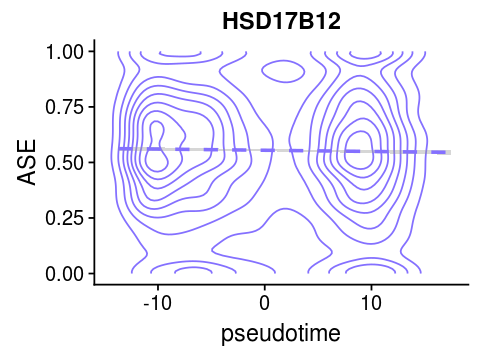

Warning message:
“Removed 24580 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 24580 rows containing non-finite values (stat_smooth).”

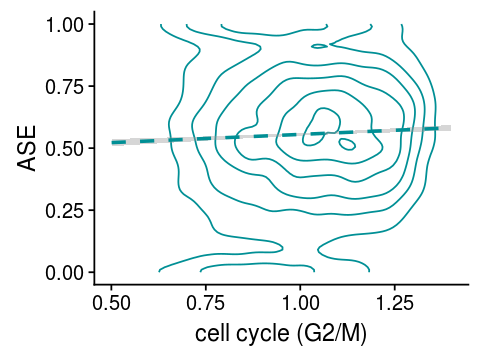

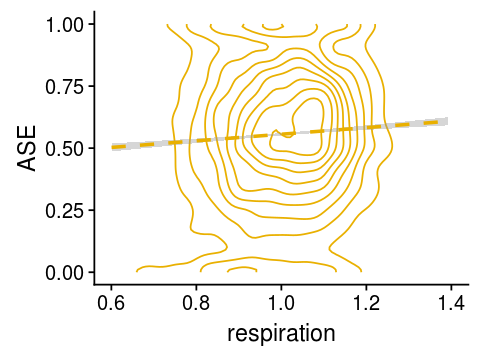

In [163]:
options(repr.plot.width = 4, repr.plot.height = 3)
p1
p2
p3